# Project on Crimes on Women

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
df = pd.read_csv("CrimesOnWomenData.csv")

In [327]:
df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


In [331]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [333]:
df = df.rename(columns = {'K&A' : 'Kidnapping and Abduction', 'DD': 'Dowry Deaths','AoW' : 'Assault against Women', 'AoM' : 'Assault against Modesty of Women', 'DV' : 'Domestic Violence', 'WT' : 'Women Trafficking'})

In [335]:
df

,State,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault against Women,Assault against Modesty of Women,Domestic Violence,Women Trafficking
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0


In [337]:
pd.DataFrame({'count': df.shape[0], 'nulls': df.isnull().sum(), 'nulls%': df.isnull().mean() * 100, 'cardinality': df.nunique()})

,count,nulls,nulls%,cardinality
State,736,0,0.0,70
Year,736,0,0.0,21
Rape,736,0,0.0,498
Kidnapping and Abduction,736,0,0.0,491
Dowry Deaths,736,0,0.0,319
Assault against Women,736,0,0.0,505
Assault against Modesty of Women,736,0,0.0,322
Domestic Violence,736,0,0.0,488
Women Trafficking,736,0,0.0,124


In [339]:
len(df.State.unique())

70

In [341]:
df.State.unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A & N Islands', 'Chandigarh', 'D&N Haveli',
  

In [343]:
df.describe()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault against Women,Assault against Modesty of Women,Domestic Violence,Women Trafficking
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [388]:
data = df.select_dtypes(exclude=['object'])
data.corr()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault against Women,Assault against Modesty of Women,Domestic Violence,Women Trafficking
Year,1.000000,0.173887,0.304664,-0.000553,0.238821,0.004101,0.165201,0.208886
Rape,0.173887,1.000000,0.700730,0.553497,0.804336,0.458025,0.680321,0.219218
Kidnapping and Abduction,0.304664,0.700730,1.000000,0.691524,0.671159,0.355703,0.685999,0.179016
Dowry Deaths,-0.000553,0.553497,0.691524,1.000000,0.456012,0.422970,0.487465,0.093254
Assault against Women,0.238821,0.804336,0.671159,0.456012,1.000000,0.521432,0.631558,0.284338
Assault against Modesty of Women,0.004101,0.458025,0.355703,0.422970,0.521432,1.000000,0.419300,0.260077
Domestic Violence,0.165201,0.680321,0.685999,0.487465,0.631558,0.419300,1.000000,0.280839
Women Trafficking,0.208886,0.219218,0.179016,0.093254,0.284338,0.260077,0.280839,1.000000


<Axes: >

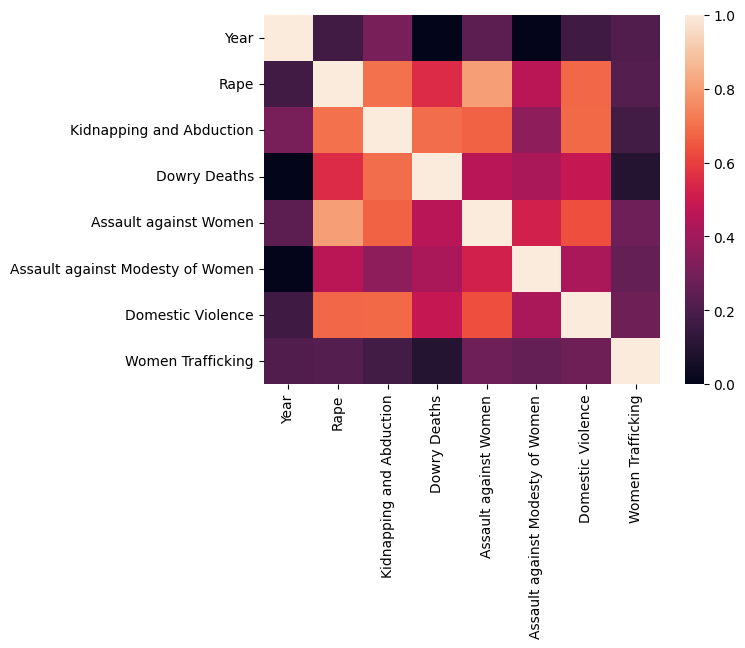

In [390]:
sns.heatmap(data.corr())

In [392]:
df.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [394]:
Rape = df.groupby(['State']).agg({
    'Rape': 'sum'
}).sort_values(by = 'Rape', ascending=False)[:15]
Rape

,Rape
State,
Madhya Pradesh,43552
Rajasthan,31850
Uttar Pradesh,30641
MADHYA PRADESH,29256
Maharashtra,24806
Assam,19428
Kerala,18888
Punjab,18762
WEST BENGAL,16378


In [396]:
df.groupby(['Year']).agg({
    'Rape': 'sum'
}).sort_values(by = 'Rape', ascending=False)[:15]

,Rape
Year,
2016,38947
2014,36735
2015,34651
2013,33707
2018,33356
2017,32559
2019,32033
2021,31677
2020,28046


In [398]:
K_A = df.groupby(['State']).agg({
    'Kidnapping and Abduction': 'sum'
}).sort_values(by = 'Kidnapping and Abduction', ascending=False)[:15]
K_A

,Kidnapping and Abduction
State,
Uttar Pradesh,101701
Bihar,65137
Assam,55094
Madhya Pradesh,50457
Maharashtra,38061
West Bengal,37848
Rajasthan,36059
UTTAR PRADESH,32155
Delhi UT,31251


In [400]:
df.groupby(['Year']).agg({
    'Kidnapping and Abduction': 'sum'
}).sort_values(by = 'Kidnapping and Abduction', ascending=False)[:15]

,Kidnapping and Abduction
Year,
2021,75369
2019,72780
2018,72751
2017,66333
2016,64519
2020,62300
2015,59277
2014,57311
2013,51881


In [402]:
DD = df.groupby(['State']).agg({
    'Dowry Deaths': 'sum'
}).sort_values(by = 'Dowry Deaths', ascending=False)[:15]
DD

,Dowry Deaths
State,
Uttar Pradesh,21357
UTTAR PRADESH,19258
Bihar,13568
BIHAR,10860
MADHYA PRADESH,7482
Madhya Pradesh,5834
ANDHRA PRADESH,5112
Tripura,4729
Jharkhand,4107


In [404]:
df.groupby(['Year']).agg({
    'Dowry Deaths': 'sum'
}).sort_values(by = 'Dowry Deaths', ascending=False)[:15]

,Dowry Deaths
Year,
2014,10050
2011,8618
2010,8248
2009,8242
2012,8233
2013,8083
2008,8043
2007,7955
2015,7634


In [406]:
AoW = df.groupby(['State']).agg({
    'Assault against Women': 'sum'
}).sort_values(by = 'Assault against Women', ascending=False)[:15]
AoW

,Assault against Women
State,
Madhya Pradesh,85442
Uttar Pradesh,76654
Maharashtra,76029
MADHYA PRADESH,66558
Odisha,60921
Andhra Pradesh,49750
Karnataka,46379
Kerala,45082
ANDHRA PRADESH,42334


In [408]:
df.groupby(['Year']).agg({
    'Assault against Women': 'sum'
}).sort_values(by = 'Assault against Women', ascending=False)[:15]

,Assault against Women
Year,
2021,89200
2018,89097
2019,88367
2017,86001
2020,85392
2016,84746
2015,82422
2014,82235
2013,70739


In [410]:
AoM = df.groupby(['State']).agg({
    'Assault against Modesty of Women': 'sum'
}).sort_values(by = 'Assault against Modesty of Women', ascending=False)[:15]
AoM

,Assault against Modesty of Women
State,
ANDHRA PRADESH,28759
UTTAR PRADESH,26500
Andhra Pradesh,25925
Maharashtra,20948
Uttar Pradesh,20024
Madhya Pradesh,13850
MAHARASHTRA,9745
TAMIL NADU,9197
MADHYA PRADESH,7781


In [412]:
df.groupby(['Year']).agg({
    'Assault against Modesty of Women': 'sum'
}).sort_values(by = 'Assault against Modesty of Women', ascending=False)[:15]

,Assault against Modesty of Women
Year,
2016,27344
2015,24041
2014,21938
2013,12589
2003,12220
2008,12084
2009,10891
2007,10783
2002,10027


In [414]:
DV = df.groupby(['State']).agg({
    'Domestic Violence': 'sum'
}).sort_values(by = 'Domestic Violence', ascending=False)[:15]
DV

,Domestic Violence
State,
West Bengal,171204
Rajasthan,126917
Assam,107680
Uttar Pradesh,100227
Andhra Pradesh,96269
ANDHRA PRADESH,92242
WEST BENGAL,91031
RAJASTHAN,74571
Maharashtra,67545


In [416]:
data.groupby(['Year']).agg({
    'Domestic Violence': 'sum'
}).sort_values(by = 'Domestic Violence', ascending=False)[:15]

,Domestic Violence
Year,
2021,136234
2019,125298
2014,122877
2013,118866
2015,113403
2020,111549
2016,110378
2012,106527
2017,104551


In [418]:
WT = df.groupby(['State']).agg({
    'Women Trafficking': 'sum'
}).sort_values(by = 'Women Trafficking', ascending=False)[:15]
WT

,Women Trafficking
State,
Tamil Nadu,4026
Karnataka,2796
Maharashtra,2531
Andhra Pradesh,2531
Kerala,990
Telangana,866
West Bengal,838
Rajasthan,662
Sikkim,613


In [420]:
data.groupby(['Year']).agg({
    'Women Trafficking': 'sum'
}).sort_values(by = 'Women Trafficking', ascending=False)[:15]

,Women Trafficking
Year,
2013,2579
2012,2563
2011,2435
2015,2424
2016,2214
2014,2070
2017,1536
2018,1459
2019,1185


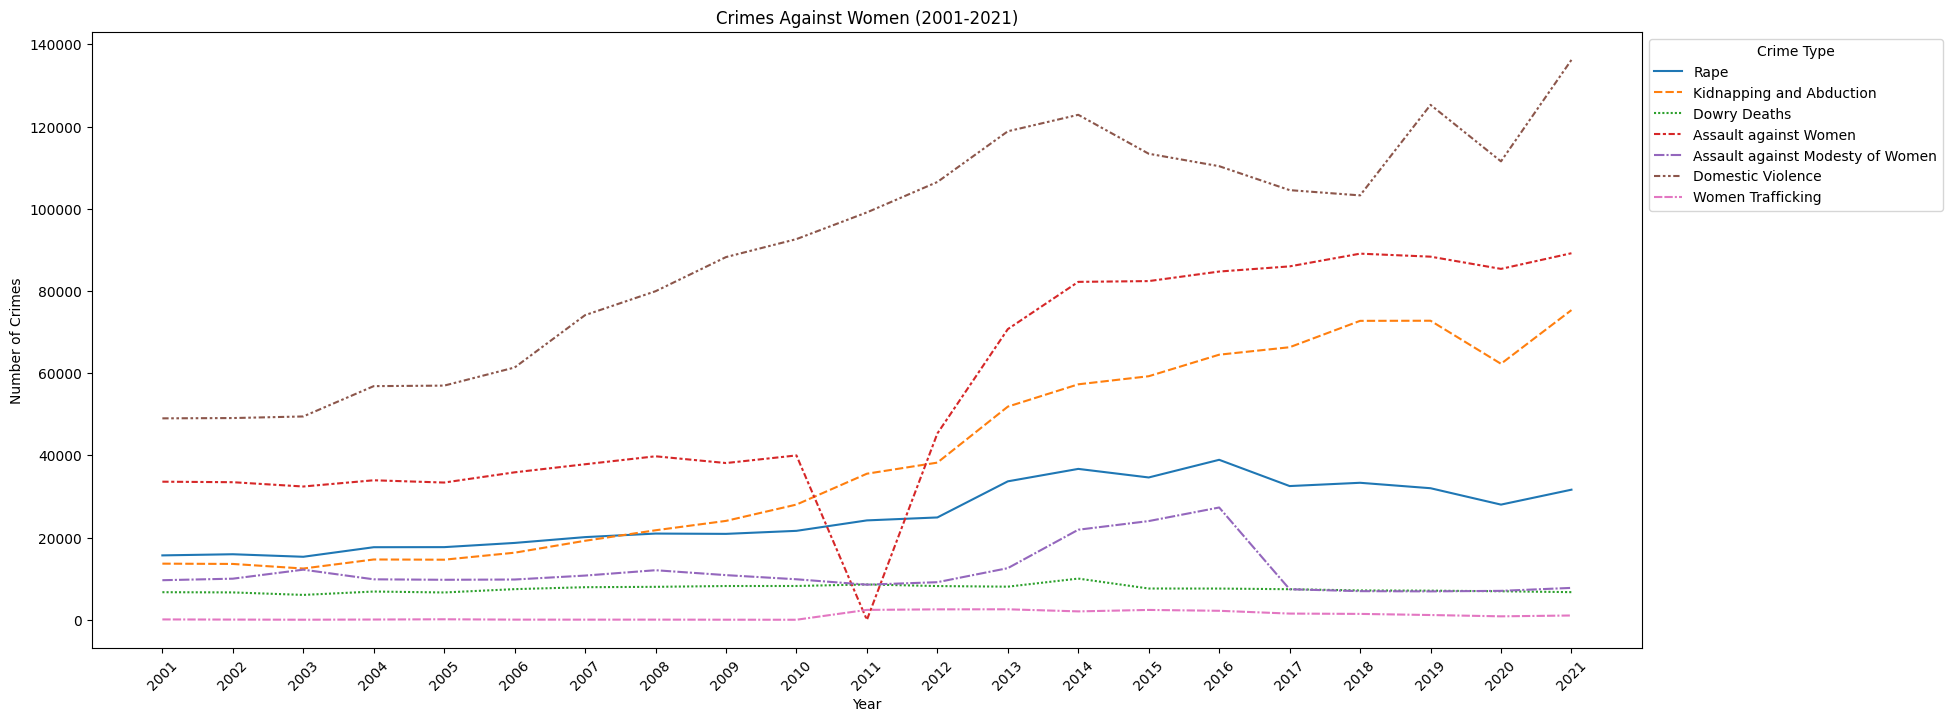

In [422]:
crime = df.groupby('Year').sum()

plt.figure(figsize=(20, 8))
sns.lineplot(data=crime)
plt.title('Crimes Against Women (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
years = list(range(2001, 2022, 1)) 
plt.xticks(ticks=years, rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

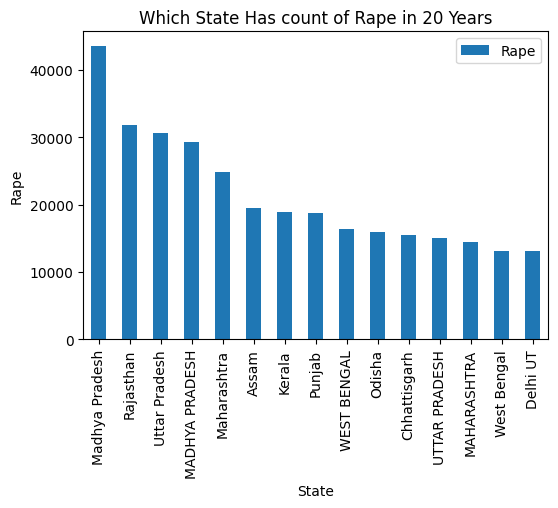

In [423]:
Rape.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Rape in 20 Years')
plt.xlabel('State')
plt.ylabel('Rape')

plt.show()

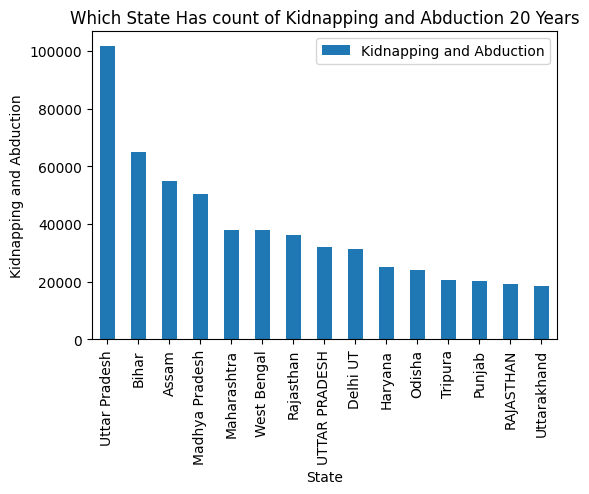

In [426]:
K_A.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Kidnapping and Abduction 20 Years')
plt.xlabel('State')
plt.ylabel('Kidnapping and Abduction')

plt.show()

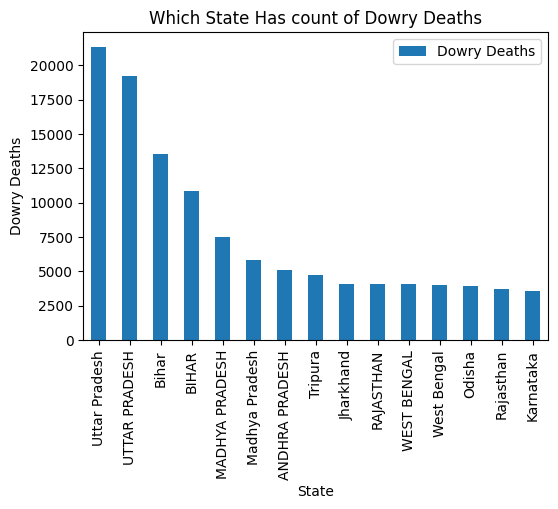

In [428]:
DD.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Dowry Deaths')
plt.xlabel('State')
plt.ylabel('Dowry Deaths')

plt.show()

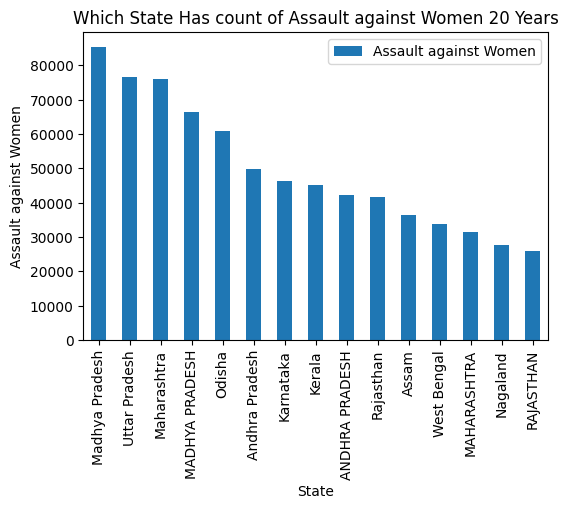

In [430]:
AoW.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Assault against Women 20 Years')
plt.xlabel('State')
plt.ylabel('Assault against Women')

plt.show()

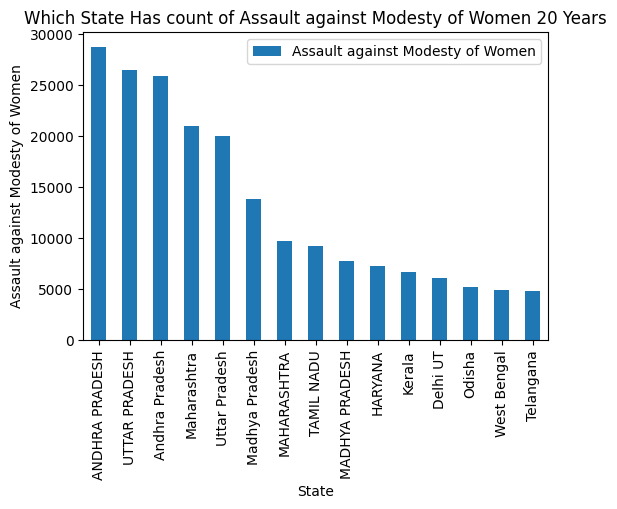

In [432]:
AoM.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Assault against Modesty of Women 20 Years')
plt.xlabel('State')
plt.ylabel('Assault against Modesty of Women')

plt.show()


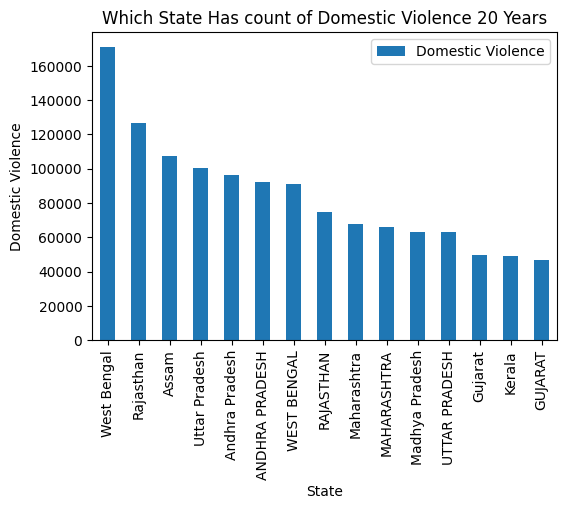

In [433]:
DV.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Domestic Violence 20 Years')
plt.xlabel('State')
plt.ylabel('Domestic Violence')

plt.show()

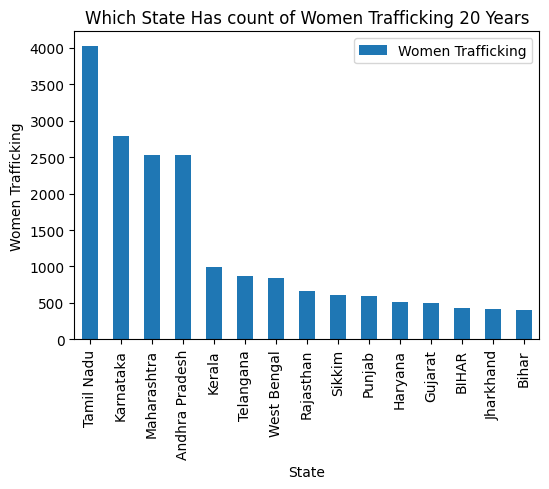

In [435]:
WT.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Women Trafficking 20 Years')
plt.xlabel('State')
plt.ylabel('Women Trafficking')

plt.show()

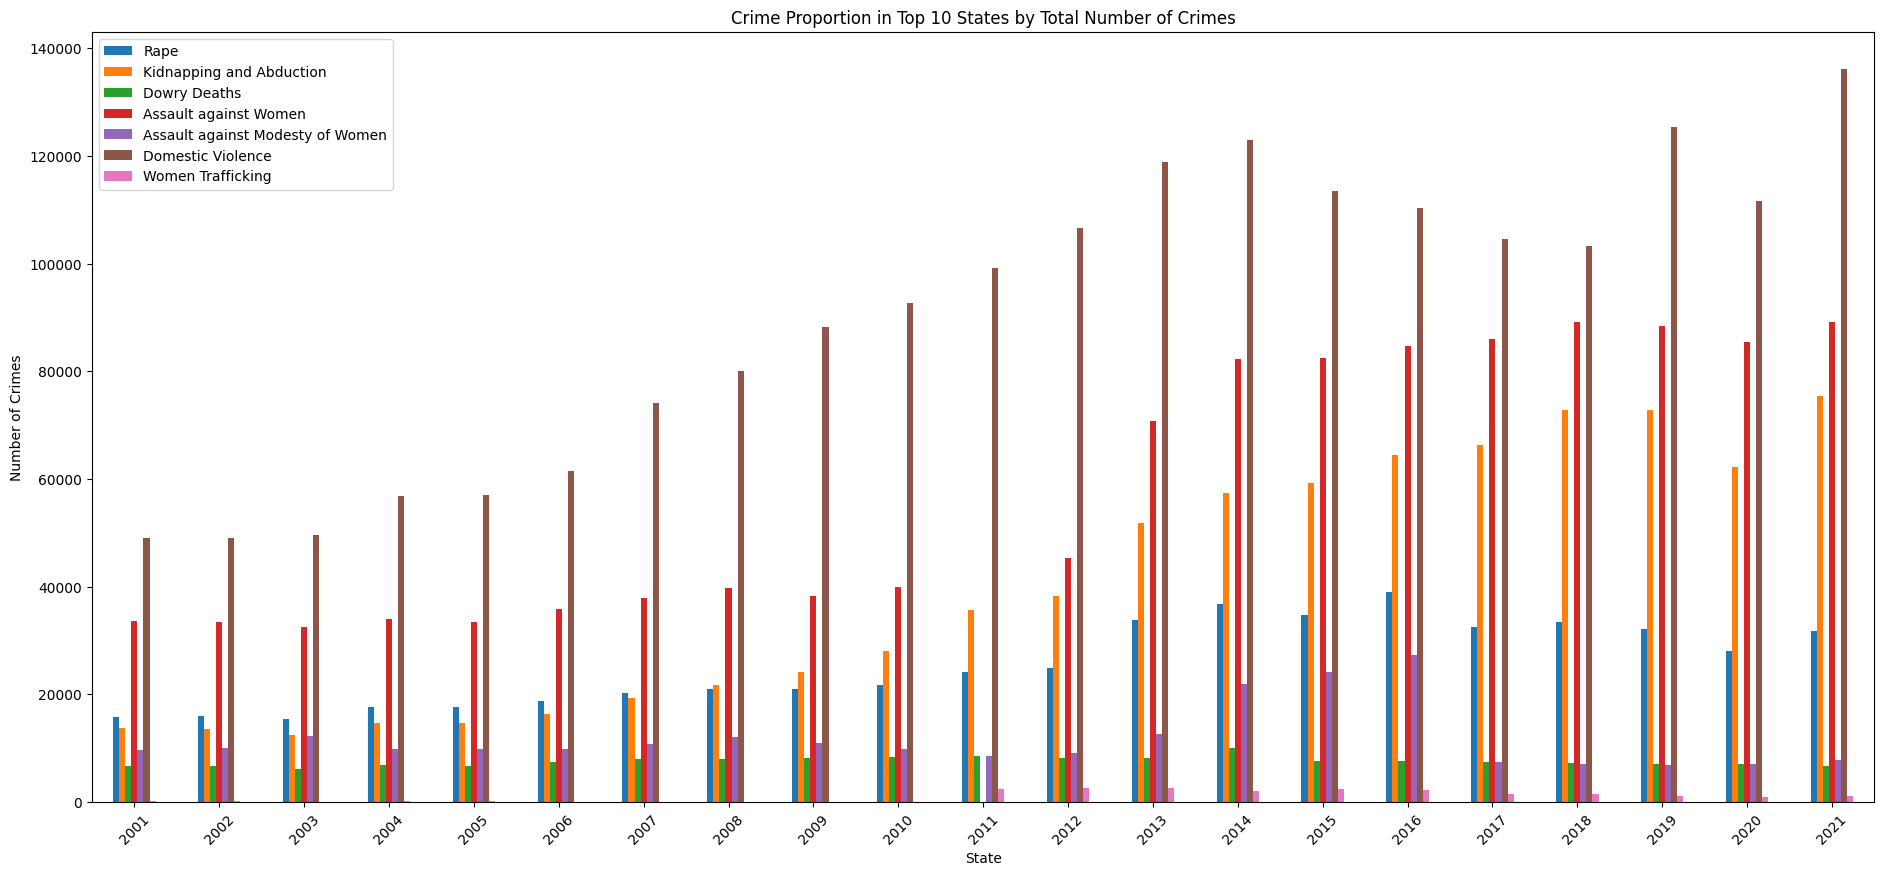

In [437]:
data.groupby(['Year']).agg({
    'Rape': 'sum',
    'Kidnapping and Abduction': 'sum',
    'Dowry Deaths': 'sum',
    'Assault against Women': 'sum',
    'Assault against Modesty of Women': 'sum',
    'Domestic Violence': 'sum',
    'Women Trafficking': 'sum'
}).plot(kind = 'bar', figsize=(23, 10))
plt.title('Crime Proportion in Top 10 States by Total Number of Crimes')
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)

plt.show()